# About the project

Given are the sales data for the 12 months of the year 2019. Perform a cohort analysis on various business metrics like retention rate, average sales etc.

**Content of the data**
- Order ID - An Order ID is the number system that Amazon uses exclusively to keep track of orders. Each order receives its own Order ID that will not be duplicated. This number can be useful to the seller when attempting to find out certain details about an order such as shipment date or status.
Product - The product that have been sold.
- Quantity Ordered - Ordered Quantity is the total item quantity ordered in the initial order (without any changes).
- Price Each - The price of each products.
- Order Date - This is the date the customer is requesting the order be shipped.
- Purchase Address - The purchase order is prepared by the buyer, often through a purchasing department. The purchase order, or PO, usually includes a PO number, which is useful in matching shipments with purchases; a shipping date; billing address; shipping address; and the request items, quantities and price.




# 1.Import libraries and load data

In [1]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"
%cd /content
!kaggle datasets download -d knightbearr/sales-product-data
!unzip \*.zip  && rm *.zip

/content
  0% 0.00/2.39M [00:00<?, ?B/s]
100% 2.39M/2.39M [00:00<00:00, 129MB/s]
Archive:  sales-product-data.zip
  inflating: Sales_April_2019.csv    
  inflating: Sales_August_2019.csv   
  inflating: Sales_December_2019.csv  
  inflating: Sales_February_2019.csv  
  inflating: Sales_January_2019.csv  
  inflating: Sales_July_2019.csv     
  inflating: Sales_June_2019.csv     
  inflating: Sales_March_2019.csv    
  inflating: Sales_May_2019.csv      
  inflating: Sales_November_2019.csv  
  inflating: Sales_October_2019.csv  
  inflating: Sales_September_2019.csv  


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import missingno as msno
from textwrap import wrap

In [3]:
df = pd.read_csv('/content/Sales_January_2019.csv')
df2 = pd.read_csv('/content/Sales_February_2019.csv')
df3 = pd.read_csv('/content/Sales_March_2019.csv')
df4 = pd.read_csv('/content/Sales_April_2019.csv')
df5 = pd.read_csv('/content/Sales_May_2019.csv')
df6 = pd.read_csv('/content/Sales_June_2019.csv')
df7 = pd.read_csv('/content/Sales_July_2019.csv')
df8 = pd.read_csv('/content/Sales_August_2019.csv')
df9 = pd.read_csv('/content/Sales_September_2019.csv')
df10 = pd.read_csv('/content/Sales_October_2019.csv')
df11 = pd.read_csv('/content/Sales_November_2019.csv')
df12 = pd.read_csv('/content/Sales_December_2019.csv')

# 2.Data Cleaning

* First, lets merge all the dataframes to a single dataframe, as each dataframe contains sales data for each month of the year 2019.

In [4]:
df = pd.concat([df, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12], ignore_index=True)
#df = pd.read_csv('/content/Supermart Grocery Sales - Retail Analytics Dataset.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [5]:
df['Purchase Address'].nunique()

140788

In [6]:
df.shape

(186850, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


There seems to be some missing values. Lets look deeper into it.

In [8]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [9]:
df = df.drop_duplicates()
df.shape

(185688, 6)

In [10]:
df.nunique()

Order ID            178438
Product                 20
Quantity Ordered        10
Price Each              24
Order Date          142396
Purchase Address    140788
dtype: int64

In [11]:
for col in ['Product', 'Quantity Ordered', 'Price Each']:
  print(df[col].unique())

['iPhone' 'Lightning Charging Cable' 'Wired Headphones' '27in FHD Monitor'
 'AAA Batteries (4-pack)' '27in 4K Gaming Monitor' 'USB-C Charging Cable'
 'Bose SoundSport Headphones' 'Apple Airpods Headphones'
 'Macbook Pro Laptop' 'Flatscreen TV' 'Vareebadd Phone'
 'AA Batteries (4-pack)' 'Google Phone' '20in Monitor'
 '34in Ultrawide Monitor' 'ThinkPad Laptop' 'LG Dryer'
 'LG Washing Machine' nan 'Product']
['1' '2' '3' '5' '4' nan '7' 'Quantity Ordered' '6' '9' '8']
['700' '14.95' '11.99' '149.99' '2.99' '389.99' '11.95' '99.99' '150'
 '1700' '300' '400' '3.84' '600' '109.99' '379.99' '999.99' '600.0' nan
 'Price Each' '700.0' '150.0' '300.0' '1700.0' '400.0']


When we observe the unique values for the columns mentioned above, we can see that each column has one of the unique values as the column name itself. It might also be safe to assume that every other columns in the dataset also contains such value. Lets look at them.

In [12]:
for col in df.columns:
  print(col + ':' + str(df[df[col] == col].shape[0]))

Order ID:1
Product:1
Quantity Ordered:1
Price Each:1
Order Date:1
Purchase Address:1


Our assumption is correct. As the next step, lets remove such values.

In [13]:
for col in df.columns:
  df = df[df[col] != col]

for col in df.columns:
  print(col + ':' + str(df[df[col] == col].shape[0]))

Order ID:0
Product:0
Quantity Ordered:0
Price Each:0
Order Date:0
Purchase Address:0


Now, we can see that Order Date column has 'object' datatype. Lets change that.

In [14]:
df = df[df['Order ID'].isna()==False]

In [15]:
df['Quantity Ordered'] = df['Quantity Ordered'].astype(int)
df['Price Each'] = df['Price Each'].astype(float)
df['Order Date'] = df['Order Date'].astype('datetime64[ns]')
#df['Order Date'] = dt.datetime.strptime(pd.to_datetime(df['Order Date']), '%d-%m-%Y')
#df['Order Date'] = pd.to_datetime(df['Order Date']).dt.date

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185686 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185686 non-null  object        
 1   Product           185686 non-null  object        
 2   Quantity Ordered  185686 non-null  int64         
 3   Price Each        185686 non-null  float64       
 4   Order Date        185686 non-null  datetime64[ns]
 5   Purchase Address  185686 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 9.9+ MB


In [17]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"


Now, that data cleaning is done, lets start the cohort analysis

# 3.Cohort Analysis

The first step is to create cohorts. But before creating cohorts, we need to munge two columns regarding months: one is invoice month, the other is cohort month.

Lets create a helper function “get_month” to create the invoice month column first.

In [20]:
def get_month(x):
    return dt.datetime(x.year, x.month, 1)

In [21]:
df['OrderMonth'] = df['Order Date'].apply(lambda x: dt.datetime(x.year, x.month, 1))
#df['CohortMonth'] = df.groupby('Order ID')['InvoiceMonth'].transform('min')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,OrderMonth
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",2019-01-01
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",2019-01-01
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",2019-01-01
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",2019-01-01
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",2019-01-01


## Cohort 1: Active Users and Retention rate

In [22]:
# Grouping by Purchase Address (assuming each purchase address as a customer) and select the OrderMonth value
grouping = df.groupby('Purchase Address')['OrderMonth'] 

In [23]:
# Assign the min value of OrderMonth for each cohort
df['CohortMonth'] = grouping.transform(min)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,OrderMonth,CohortMonth
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",2019-01-01,2019-01-01
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",2019-01-01,2019-01-01
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",2019-01-01,2019-01-01
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",2019-01-01,2019-01-01
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",2019-01-01,2019-01-01


Next, we create a **cohort index** for each row. The cohort index is the month difference between invoice month and cohort month for each row. By doing the deduction, we are able to know the month lapse between a specific order and the first order that user made on Amazon.

In [24]:
def get_date(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

In [25]:
invoice_year, invoice_month, _ = get_date(df, 'OrderMonth')
cohort_year, cohort_month, _ = get_date(df, 'CohortMonth')

In [26]:
# Get the difference in years
years_diff = invoice_year - cohort_year

# Get the difference in months
months_diff = invoice_month - cohort_month

In [27]:
df['CohortIndex'] = years_diff * 12 + months_diff  + 1 

In [28]:
cohort_data = df.groupby(['CohortMonth', 'CohortIndex'])['Purchase Address'].apply(pd.Series.nunique).reset_index()
cohort_data

,CohortMonth,CohortIndex,Purchase Address
0,2019-01-01,1,9154
1,2019-01-01,2,289
2,2019-01-01,3,364
3,2019-01-01,4,446
4,2019-01-01,5,401
...,...,...,...
80,2019-11-01,1,11290
81,2019-11-01,2,660
82,2019-12-01,1,15416
83,2019-12-01,2,1


In [29]:
# Assigning column names to the dataframe created above
cohort_counts = cohort_data.pivot(index='CohortMonth',
                                 columns ='CohortIndex',
                                 values = 'Purchase Address')
cohort_counts

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2019-01-01,9154.0,289.0,364.0,446.0,401.0,368.0,389.0,341.0,308.0,499.0,461.0,581.0
2019-02-01,11015.0,424.0,532.0,507.0,374.0,439.0,363.0,375.0,606.0,497.0,697.0,5.0
2019-03-01,13457.0,663.0,535.0,478.0,444.0,465.0,426.0,715.0,626.0,842.0,2.0,NaN
2019-04-01,15471.0,694.0,526.0,596.0,488.0,483.0,807.0,712.0,1015.0,2.0,NaN,NaN
2019-05-01,13334.0,457.0,509.0,406.0,407.0,657.0,594.0,857.0,1.0,NaN,NaN,NaN
2019-06-01,10517.0,425.0,291.0,328.0,568.0,499.0,644.0,NaN,NaN,NaN,NaN,NaN
2019-07-01,10671.0,329.0,306.0,558.0,467.0,701.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-01,8617.0,242.0,439.0,372.0,485.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-01,8150.0,389.0,356.0,489.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We will create a pivot table to calculate the retention rate for each Cohort.

In [30]:
cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis=0)

# Coverting the retention rate into percentage and Rounding off.
retention.round(3)*100

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2019-01-01,100.0,3.2,4.0,4.9,4.4,4.0,4.2,3.7,3.4,5.5,5.0,6.3
2019-02-01,100.0,3.8,4.8,4.6,3.4,4.0,3.3,3.4,5.5,4.5,6.3,0.0
2019-03-01,100.0,4.9,4.0,3.6,3.3,3.5,3.2,5.3,4.7,6.3,0.0,NaN
2019-04-01,100.0,4.5,3.4,3.9,3.2,3.1,5.2,4.6,6.6,0.0,NaN,NaN
2019-05-01,100.0,3.4,3.8,3.0,3.1,4.9,4.5,6.4,0.0,NaN,NaN,NaN
2019-06-01,100.0,4.0,2.8,3.1,5.4,4.7,6.1,NaN,NaN,NaN,NaN,NaN
2019-07-01,100.0,3.1,2.9,5.2,4.4,6.6,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-01,100.0,2.8,5.1,4.3,5.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-01,100.0,4.8,4.4,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


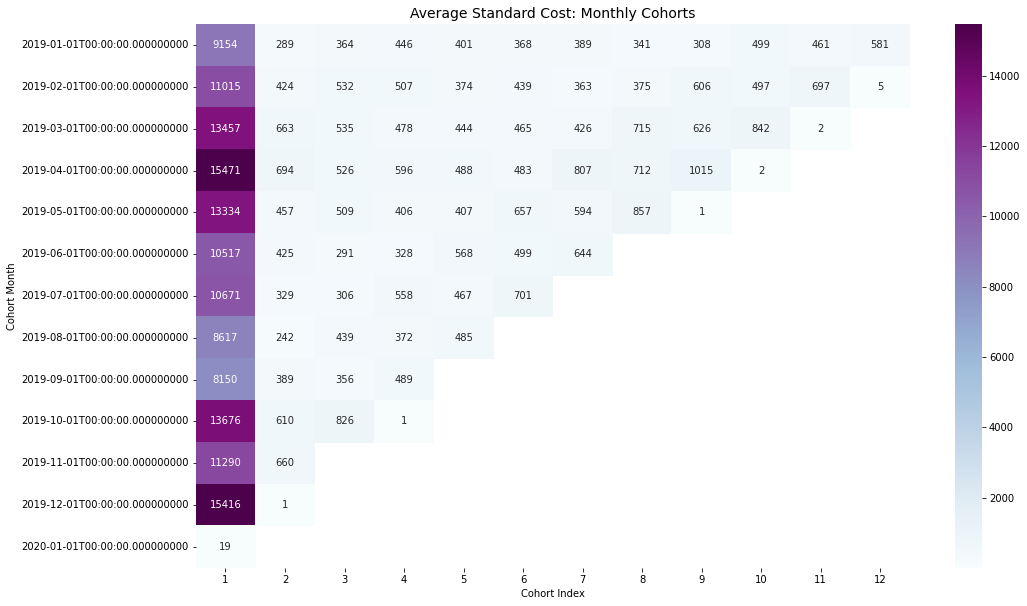

In [31]:
# Initialize the figure
plt.figure(figsize=(16, 10))
# Adding a title
plt.title('Average Standard Cost: Monthly Cohorts', fontsize = 14)

# Creating the heatmap
sns.heatmap(cohort_counts, annot = True,cmap="BuPu", fmt='g')
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index')
plt.yticks( rotation='360')
plt.show()

## Cohort 2: Average Quantity Sold

For the next metrics, we find the average quantity on the time series basis.

In [32]:
cohort_data2 = df.groupby(['CohortMonth', 'CohortIndex'])['Quantity Ordered'].mean().reset_index()

In [33]:
average_quantity  = cohort_data2.pivot_table(index = 'CohortMonth',
                                            columns = 'CohortIndex',
                                       values = 'Quantity Ordered').round(1)
average_quantity

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2019-01-01,1.1,1.1,1.1,1.1,1.2,1.1,1.1,1.1,1.1,1.1,1.1,1.1
2019-02-01,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.0
2019-03-01,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.0,NaN
2019-04-01,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.3,NaN,NaN
2019-05-01,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.1,1.0,NaN,NaN,NaN
2019-06-01,1.1,1.1,1.1,1.1,1.1,1.1,1.1,NaN,NaN,NaN,NaN,NaN
2019-07-01,1.1,1.1,1.1,1.1,1.1,1.1,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-01,1.1,1.1,1.1,1.1,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-01,1.1,1.1,1.1,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


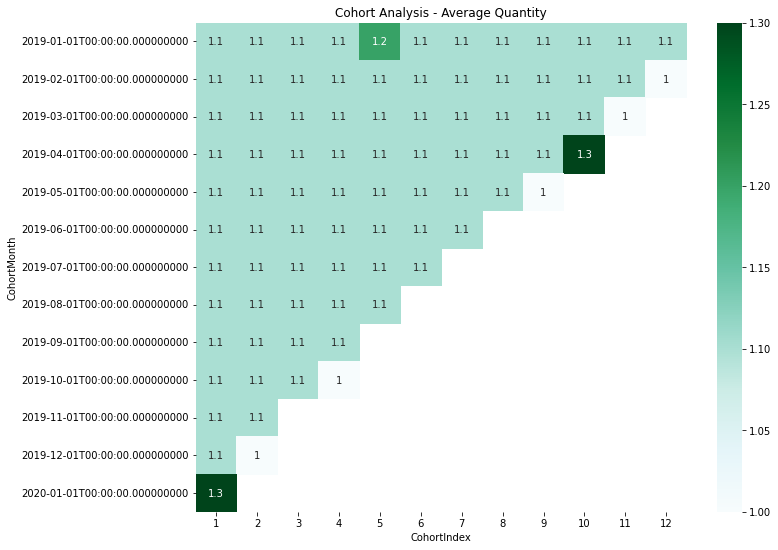

In [34]:
# Visualize
plt.figure(figsize = (11,9))
plt.title('Cohort Analysis - Average Quantity')
sns.heatmap(data = average_quantity, 
            annot = True, 
            cmap = "BuGn")
plt.show()

We can observe that within the recent cohort/month, the average quantity on the website was almost constant. This is not a bad thing but neither is it good, as our aim should be to sell more quantity.

## Cohort 3: Average Sales

For this, we need to first find the total sales, which can be calsulated by multiplying Quantity Ordered and Price Each columns

In [35]:
df['TotalSale'] = df['Quantity Ordered'] * df['Price Each']

In [36]:
# Prepare the cohort data
cohort_data3 = df.groupby(['CohortMonth', 'CohortIndex'])['TotalSale'].mean().reset_index()

In [37]:
average_sales  = cohort_data3.pivot_table(index = 'CohortMonth',
                                           columns = 'CohortIndex',
                                      values = 'TotalSale').round()
average_sales

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2019-01-01,188.0,170.0,191.0,213.0,174.0,148.0,199.0,167.0,175.0,168.0,196.0,186.0
2019-02-01,184.0,183.0,173.0,194.0,198.0,170.0,178.0,160.0,209.0,197.0,180.0,344.0
2019-03-01,185.0,175.0,172.0,176.0,166.0,183.0,194.0,196.0,194.0,190.0,76.0,NaN
2019-04-01,186.0,167.0,180.0,193.0,181.0,193.0,192.0,177.0,179.0,247.0,NaN,NaN
2019-05-01,193.0,205.0,176.0,211.0,190.0,181.0,179.0,172.0,425.0,NaN,NaN,NaN
2019-06-01,192.0,175.0,164.0,172.0,189.0,174.0,212.0,NaN,NaN,NaN,NaN,NaN
2019-07-01,187.0,201.0,163.0,193.0,167.0,173.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-01,189.0,204.0,191.0,211.0,203.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-01,180.0,149.0,141.0,172.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


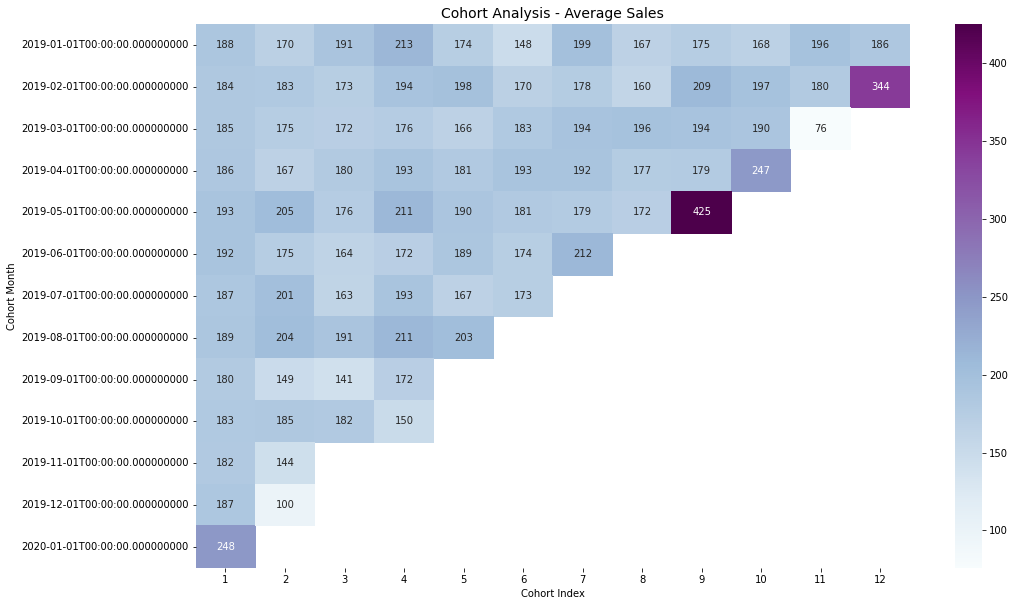

In [38]:
# Visualize
# Initialize the figure
plt.figure(figsize=(16, 10))
# Adding a title
plt.title('Cohort Analysis - Average Sales', fontsize = 14)
# Creating the heatmap
sns.heatmap(average_sales, annot = True,cmap="BuPu", fmt='g')
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index')
plt.yticks( rotation='360')
plt.show()

We can observe both dips and rise in sales.